<a href="https://colab.research.google.com/github/Dianacalvario/estadisticaverano/blob/main/gym_members_exercise_tracking_(practica5)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/Dianacalvario/estadisticaverano/refs/heads/main/gym_members_exercise_tracking.csv")
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,Male,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,Male,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,Female,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,Male,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74


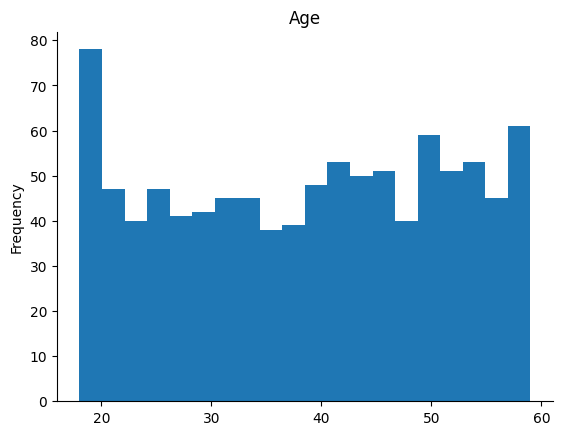

In [89]:
# @title Age

from matplotlib import pyplot as plt
df['Age'].plot(kind='hist', bins=20, title='Age')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [90]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal = ols('Calories_Burned ~ C(Gender)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(Gender),1.0,1.639714e+06,1.639714e+06,22.547934,0.000002
Residual,971.0,7.061235e+07,7.272126e+04,NaN,NaN


In [91]:
df["Gender"].unique()

array(['Male', 'Female'], dtype=object)

In [92]:
from scipy.stats import shapiro
valor_p_sh = shapiro(modelo_lineal.resid)[1]
print(f"valor-p (Shapiro) = {valor_p_sh}")

valor-p (Shapiro) = 0.00019903313691842486


In [93]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['Gender'] == 'Male']['Calories_Burned']
grupo2 = df[df['Gender'] == 'Female']['Calories_Burned']
stat, p = levene(grupo1, grupo2)
print(f"p-valor de Levene: {p}")

p-valor de Levene: 0.0021906699819997854


Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
Female   Male  82.2071   0.0 48.2331 116.181   True
---------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

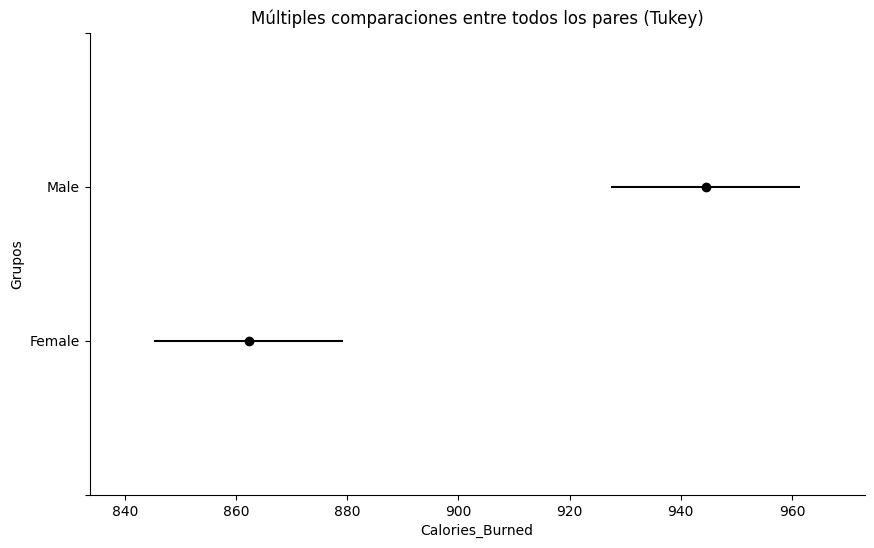

In [94]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Calories_Burned'], groups=df['Gender'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Calories_Burned")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [95]:
df["Gender"]=df["Gender"].map({"Male":2, "Female":1})
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration,Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,2,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,1,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,1,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,2,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,2,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,2,87.1,1.74,187,158,67,1.57,1364.0,Strength,10.0,3.5,4,3,28.77
969,25,2,66.6,1.61,184,166,56,1.38,1260.0,Strength,25.0,3.0,2,1,25.69
970,59,1,60.4,1.76,194,120,53,1.72,929.0,Cardio,18.8,2.7,5,3,19.50
971,32,2,126.4,1.83,198,146,62,1.10,883.0,HIIT,28.2,2.1,3,2,37.74


In [96]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal = ols('Calories_Burned ~ C(Workout_Type)', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(Workout_Type),3.0,2.116701e+05,70556.703442,0.949043,0.41624
Residual,969.0,7.204039e+07,74345.089042,NaN,NaN


valor-p (Shapiro) = 2.4291767943152403e-05


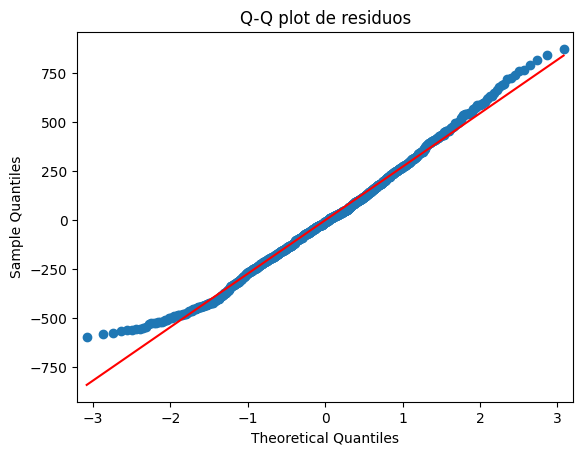

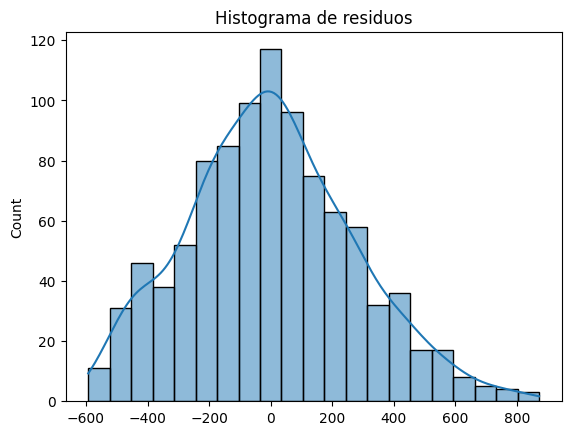

In [97]:
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

residuos = modelo_lineal.resid

# Prueba de Shapiro-Wilk
stat, valor_p_sh = shapiro(residuos)
print(f"valor-p (Shapiro) = {valor_p_sh}")

# Visualización: Q-Q plot
sm.qqplot(residuos, line='s')
plt.title("Q-Q plot de residuos")
plt.show()

# Histograma
sns.histplot(residuos, kde=True)
plt.title("Histograma de residuos")
plt.show()

In [98]:
df["Workout_Type"].unique()

array(['Yoga', 'HIIT', 'Cardio', 'Strength'], dtype=object)

In [99]:
from scipy.stats import levene

# Supón que tienes un DataFrame df con columnas 'respuesta' y 'grupo'
grupo1 = df[df['Workout_Type'] == 'Yoga']['Calories_Burned']
grupo2 = df[df['Workout_Type'] == 'HIIT']['Calories_Burned']
grupo3 = df[df['Workout_Type'] == 'Cardio']['Calories_Burned']
grupo4 = df[df['Workout_Type'] == 'Strength']['Calories_Burned']
stat, p = levene(grupo1, grupo2,grupo3,grupo4)
print(f"p-valor de Levene: {p}")

p-valor de Levene: 0.788993613463197


   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
 group1   group2  meandiff p-adj   lower    upper   reject
----------------------------------------------------------
  Cardio     HIIT  41.2917 0.3523 -23.1974 105.7809  False
  Cardio Strength  26.1839 0.6973 -35.7784  88.1463  False
  Cardio     Yoga  18.6746 0.8721 -44.5002  81.8494  False
    HIIT Strength -15.1078 0.9306 -79.4226  49.2071  False
    HIIT     Yoga -22.6171 0.8107 -88.1009  42.8666  False
Strength     Yoga  -7.5094   0.99 -70.5062  55.4875  False
----------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

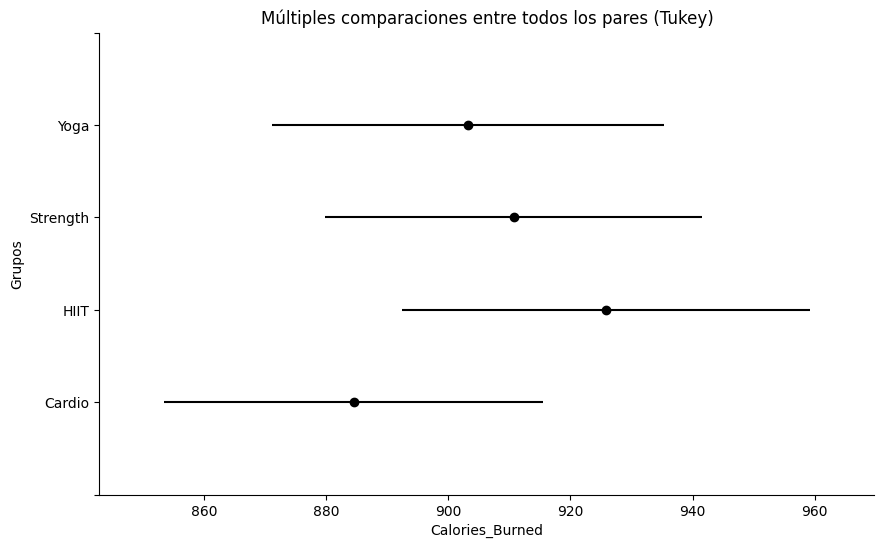

In [100]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['Calories_Burned'], groups=df['Workout_Type'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="Grupos", xlabel="Calories_Burned")

plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")

In [101]:
df=df.drop(columns=["Workout_Type"])
df

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration,Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,2,88.3,1.71,180,157,60,1.69,1313.0,12.6,3.5,4,3,30.20
1,46,1,74.9,1.53,179,151,66,1.30,883.0,33.9,2.1,4,2,32.00
2,32,1,68.1,1.66,167,122,54,1.11,677.0,33.4,2.3,4,2,24.71
3,25,2,53.2,1.70,190,164,56,0.59,532.0,28.8,2.1,3,1,18.41
4,38,2,46.1,1.79,188,158,68,0.64,556.0,29.2,2.8,3,1,14.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
968,24,2,87.1,1.74,187,158,67,1.57,1364.0,10.0,3.5,4,3,28.77
969,25,2,66.6,1.61,184,166,56,1.38,1260.0,25.0,3.0,2,1,25.69
970,59,1,60.4,1.76,194,120,53,1.72,929.0,18.8,2.7,5,3,19.50
971,32,2,126.4,1.83,198,146,62,1.10,883.0,28.2,2.1,3,2,37.74


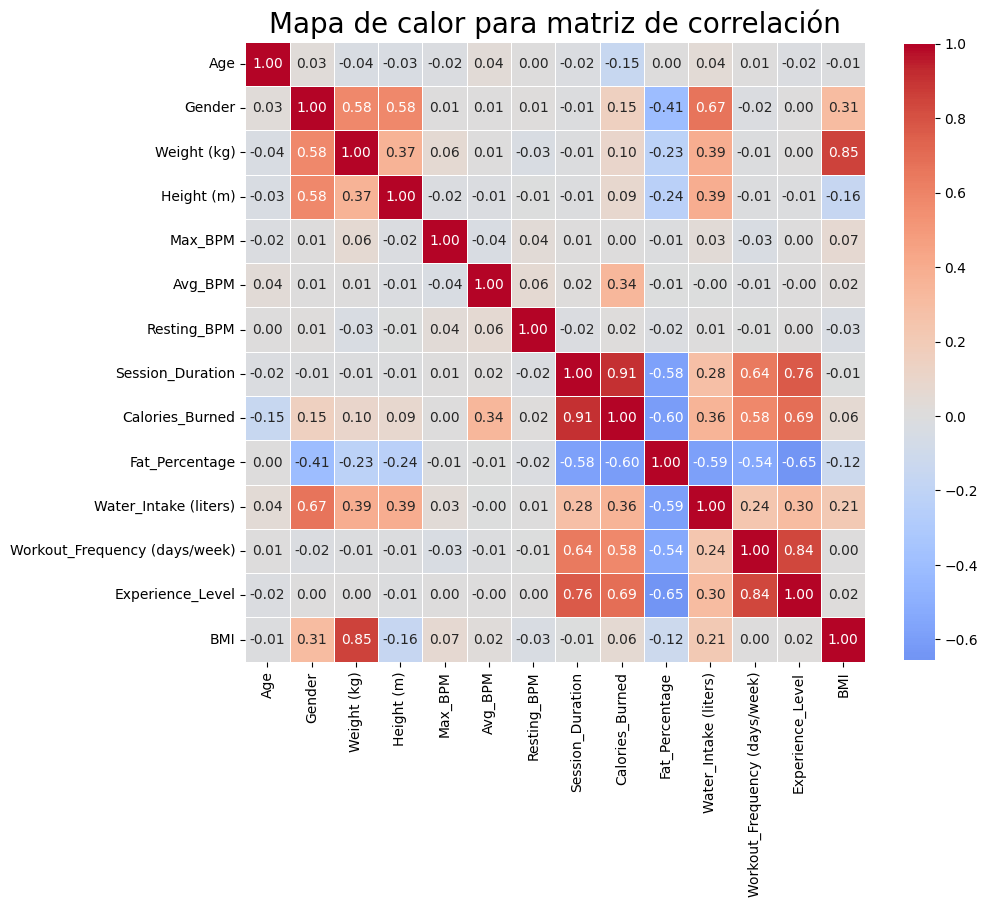

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt
matriz_de_correlacion=df.corr()
plt.figure(figsize=(10,10),dpi=100)
sns.heatmap(matriz_de_correlacion,annot=True,fmt="0.2f",cmap="coolwarm",square=True,linewidths=0.5,cbar_kws={"shrink":0.8},center=0)
plt.title("Mapa de calor para matriz de correlación",fontsize=20)
plt.yticks(rotation=0)
sns.heatmap
annot=True
fmt="0.2f"
cmap="coolwarm"
center=0
cbar_kws={"shrink":1.0}

/tmp/ipython-input-103-479058281.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


coeficiente de coorelacion
r= 0.9081403755270122
coeficiente de determinacion 0.8247189416623428
Intervalo de confianza para b1
intervalo de confianza para b1 de  95%
700.8303<b1<742.7418

valor-p de Shapiro:  0.0038

valor_p de Breusch-Pagan:  0.0000

para x = 0.5, y = [359.44654911]
para x = 1.5, y = [1081.23256503]
para x = 2.0, y = [1442.12557298]

          mean    mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  2885.697605  29.525372    2827.756716    2943.638494   2654.213033   

   obs_ci_upper  
0   3117.182176  


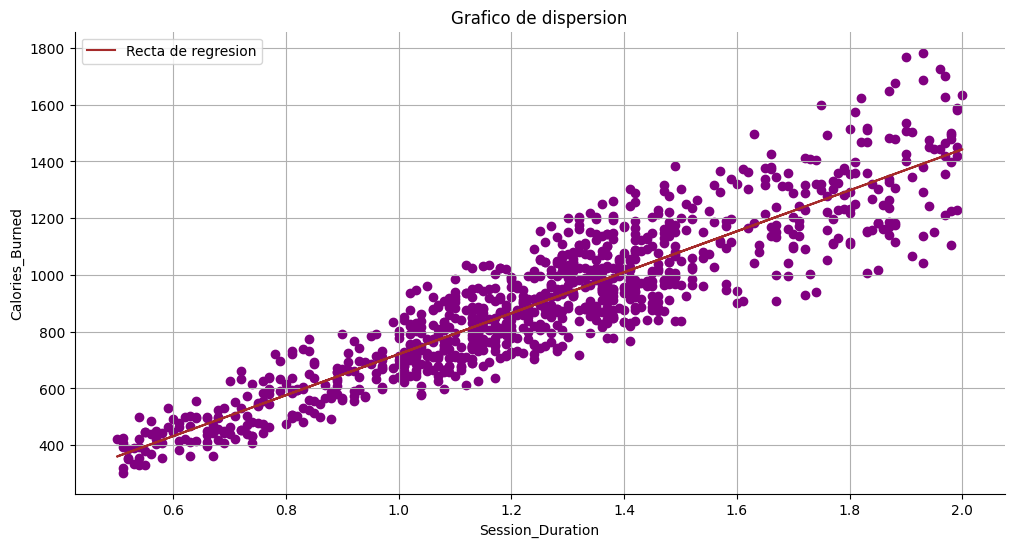

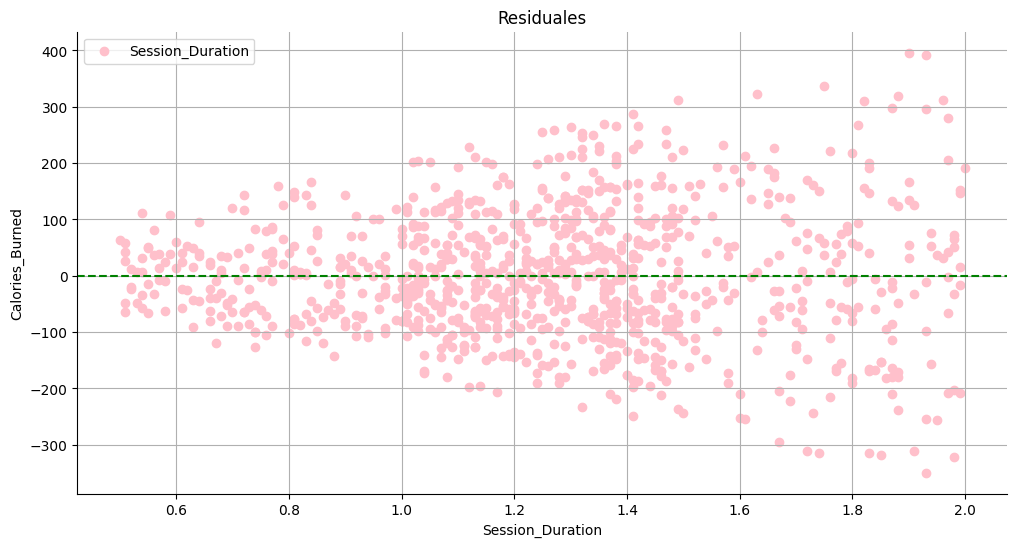

In [103]:
x = df['Session_Duration']
y = df['Calories_Burned']

# Paso 2: Diagrama de dispersión
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6), dpi=100)
plt.title("Grafico de dispersion")
plt.scatter(x, y, label="", color="purple")
plt.xlabel('Session_Duration')
plt.ylabel('Calories_Burned')
plt.legend()
plt.grid()
plt.gca().spines[["top","right"]].set_visible(False)

#3 los datos soportan la suposición de linealidad?
# sí (se ve lineal

#4 coeficiente de coorelacion
print("coeficiente de coorelacion")
from scipy.stats import pearsonr
r,_=pearsonr(x,y)
print("r=",r)

#5 Coeficiente de determinacion
import statsmodels.api as sm
x_constante=sm.add_constant(x)
modelo=sm.OLS(y,x_constante).fit()
yc=modelo.predict(x_constante) # predicted values
from sklearn.metrics import r2_score
r2=r2_score(y,yc)
print("coeficiente de determinacion",r2)

#6 Recta de regresion ajustada
plt.plot(x,yc,color="brown", label="Recta de regresion")
plt.legend()

#7 Intervalo de confianza
print("Intervalo de confianza para b1")
nivel_de_confianza = 0.95
intervalo_de_confianza = modelo.conf_int(alpha=1-nivel_de_confianza)
intervalo_de_confianza_b1 = intervalo_de_confianza.iloc[1]
print(f"intervalo de confianza para b1 de {nivel_de_confianza: 0.0%}")
print(f"{intervalo_de_confianza_b1[0]:0.4f}<b1<{intervalo_de_confianza_b1[1]:0.4f}\n")

#8 cálculo de residuales
residuales = y - yc
plt.figure(figsize=(12,6), dpi=100)
plt.title("Residuales")
plt.scatter(x, residuales, label='Session_Duration', color="pink")
plt.axhline(y=0, color="green", linestyle="--")
plt.xlabel('Session_Duration')
plt.ylabel('Calories_Burned')
plt.legend()
plt.grid()
plt.gca().spines[["top", "right"]].set_visible(False)

#9 Prueba de Shapiro-Wilk
from scipy.stats import shapiro
_, valor_p_sh = shapiro(residuales)
print(f'valor-p de Shapiro: {valor_p_sh: 0.4f}\n')

#10 Prueba de Breusch-Pagan
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f'valor_p de Breusch-Pagan: {valor_p_bp: 0.4f}\n')

#11 Interpolación y extrapolación
print(f'para x = 0.5, y = {modelo.predict([1, 0.5])}')
print(f'para x = 1.5, y = {modelo.predict([1, 1.5])}')
print(f'para x = 2.0, y = {modelo.predict([1, 2.0])}\n')

#12 Tabla ANOVA
from statsmodels.formula.api import ols
modelo_lineal = ols('Session_Duration~Calories_Burned', data=df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova
modelo.predict([1,4])
print(modelo.get_prediction([1,4]).summary_frame(alpha=0.05))